# 데이터 전처리 (Data Preprocessing)


- ML의 모든 알고리즘은 데이터 기반, 따라서 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.
 >Garbage In, Garbage Out
 
- Null 값은 어떻게 처리할 것인가?
-  - 단순히 평균값 대체? 해당 피처의 중요도가 높다면 피처의 평균으로 대처할 경우 왜곡 심할 수 있음. 따라서 업무 로직등을 상세히 검토해 더 정밀한 대체값을 선정


- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음, 따라서 문자형 값은 인코딩돼서 숫자 형으로 변환해야 함
- - 불필요한 피처라고 생각되면 삭제하는 게 더 좋음

## 데이터 인코딩

### 레이블 인코딩(Label encoding)
- 카테고리 피처를 코드형 숫자 값으로 변환 ex)상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터 등 TV :1 , 냉장고 :2 전자레인지 :3, 컴퓨터 :4
### 원-핫 인코딩(One Hot encoding)
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식
### 빈도인코딩 Frequency Encoding
### SVD 잠재 의미 분석하는 인코딩

In [1]:
#레이블 인코딩 예시
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','노트북','선풍기','선풍기','믹서기','믹서기']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 5 2 4 4 3 3]


In [2]:
#데이터가 많은 경우
print('인코딩 클래스:', encoder.classes_)
#0부터 순서대로 인코딩 값에 대한 원본을 가지고 있음

인코딩 클래스: ['TV' '냉장고' '노트북' '믹서기' '선풍기' '전자레인지']


In [3]:
#다시 디코딩 하는 법
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3,2,4,4,4,4,4,4]))

디코딩 원본값: ['선풍기' '전자레인지' '노트북' 'TV' '냉장고' '냉장고' '믹서기' '믹서기' '노트북' '선풍기' '선풍기' '선풍기'
 '선풍기' '선풍기' '선풍기']


In [4]:
from IPython.display import Image 

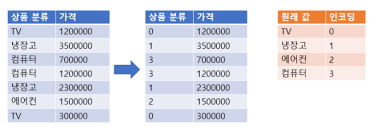

In [5]:
Image('레이블인코딩예시.png')

### 주의할 점
- 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환
- 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능 떨어지는 경우 발생
- 1과 2의 차이가 정말 차이가 있는 게 맞는 건가? 
- 숫자 값에 따른 순서나 중요도로 인식이 될 수 있음, 이런 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 별문제 없음

### 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식


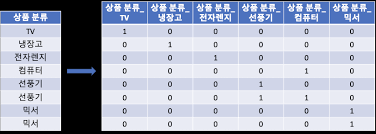

In [6]:
#원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식
Image('원-핫인코딩예시.png')

- 해당 고유 값에 메칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시)

In [3]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']

#2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 컬럼이 items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기'] 로 매칭
- 변환된 데이터의 첫 번째 레코드의 첫 번째 레코드의 첫 번째 컬럼이 1이고 나머지는 모두 0

In [2]:
import pandas as pd

In [3]:
df_1 = pd.DataFrame({'이름':['홍길동','김영희','김철수','박철수','오철수','정철수','정철수','배철수']})

In [4]:
df_1

,이름
0,홍길동
1,김영희
2,김철수
3,박철수
4,오철수
5,정철수
6,정철수
7,배철수


In [5]:
pd.get_dummies(df_1) # 원핫인코딩 바로 사용 가능

,이름_김영희,이름_김철수,이름_박철수,이름_배철수,이름_오철수,이름_정철수,이름_홍길동
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0


In [68]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [69]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [70]:
df_sns= df[['sex','embarked','class']]

In [71]:
import pandas as pd
df_1= pd.get_dummies(df_sns)

In [80]:
df_1= df_1*1

In [82]:
df_tt=pd.concat([df,df_1],axis=1)#깔끔한 하나의 숫자로 완성된 데이터프레임을 만들 수 있다!

In [83]:
df_tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,0,1,0,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,1,0,0,0,1,1,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,1,0,0,0,1,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,0,1,1,0,0,1,0,0


In [6]:
#판다스에서 지원하는 API 
#get_dummies

import pandas as pd
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']})

pd.get_dummies(df) #원핫인코딩!

,item_TV,item_냉장고,item_믹서기,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 문자열 데이터를 원핫인코더로 바꿔서 컬럼을 추가하는 게 정말로 좋은 것일까?

- 우리가 궁극적으로 (원핫)인코딩을 하는 이유는 무엇일까?
- 왜 컴퓨터가 이해할 수 있도록 바꾸는 거죠?
- 머신러닝 즉 ML 데이터 학습을 하기 위해서 -> 학습한다는데 왜 인코딩을 하죠?
- ML 학습을해서 예측을 하기 위한 것
- ex)
- 타이타닉데이터를 원한 인코딩을해서 결국 생존율 예측하려고 한다.
- ML 생존율 예측 정확도나 평가지표를 높이기 위해서 -> 생존율 y값
- y 값이라는 것은 해당 인덱스의 최종 target 우리가 예측해야 하는 값 1,0 생존, 사망
- 결국 인코딩하는 이유는 컴퓨터에게 y값에 대한 더 정확한 정보를 주어서 예측할 때 그쪽으로 더 잘 예측할 수 있도록 하는 것
- 성별 M/F 인코딩 -> 0/1 0/1 
- 성별 기타컬럼.. y값
- 0 .... .....1
- 1 ..........0



## 피처 스케일링과 정규화
### 피처 스케일링(feature scaling) 
#### 표준화(Standardization), 정규화(Normalization)

- 표준화는 데이터의 피처 각각이 평균이 0 이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 새로운 x의 값은 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산

- 표준화는 전체 평균을 기준으로 어느 정도 떨어져 있는지 나타낼 때 사용! ( -, 1 이상의 값도 가질 수 있다. )
- 정규화는 데이터의 범위를 0부터 1까지로 변환, 데이터 분포를 조정하는 방법 (0,1의 값을 가진다. )

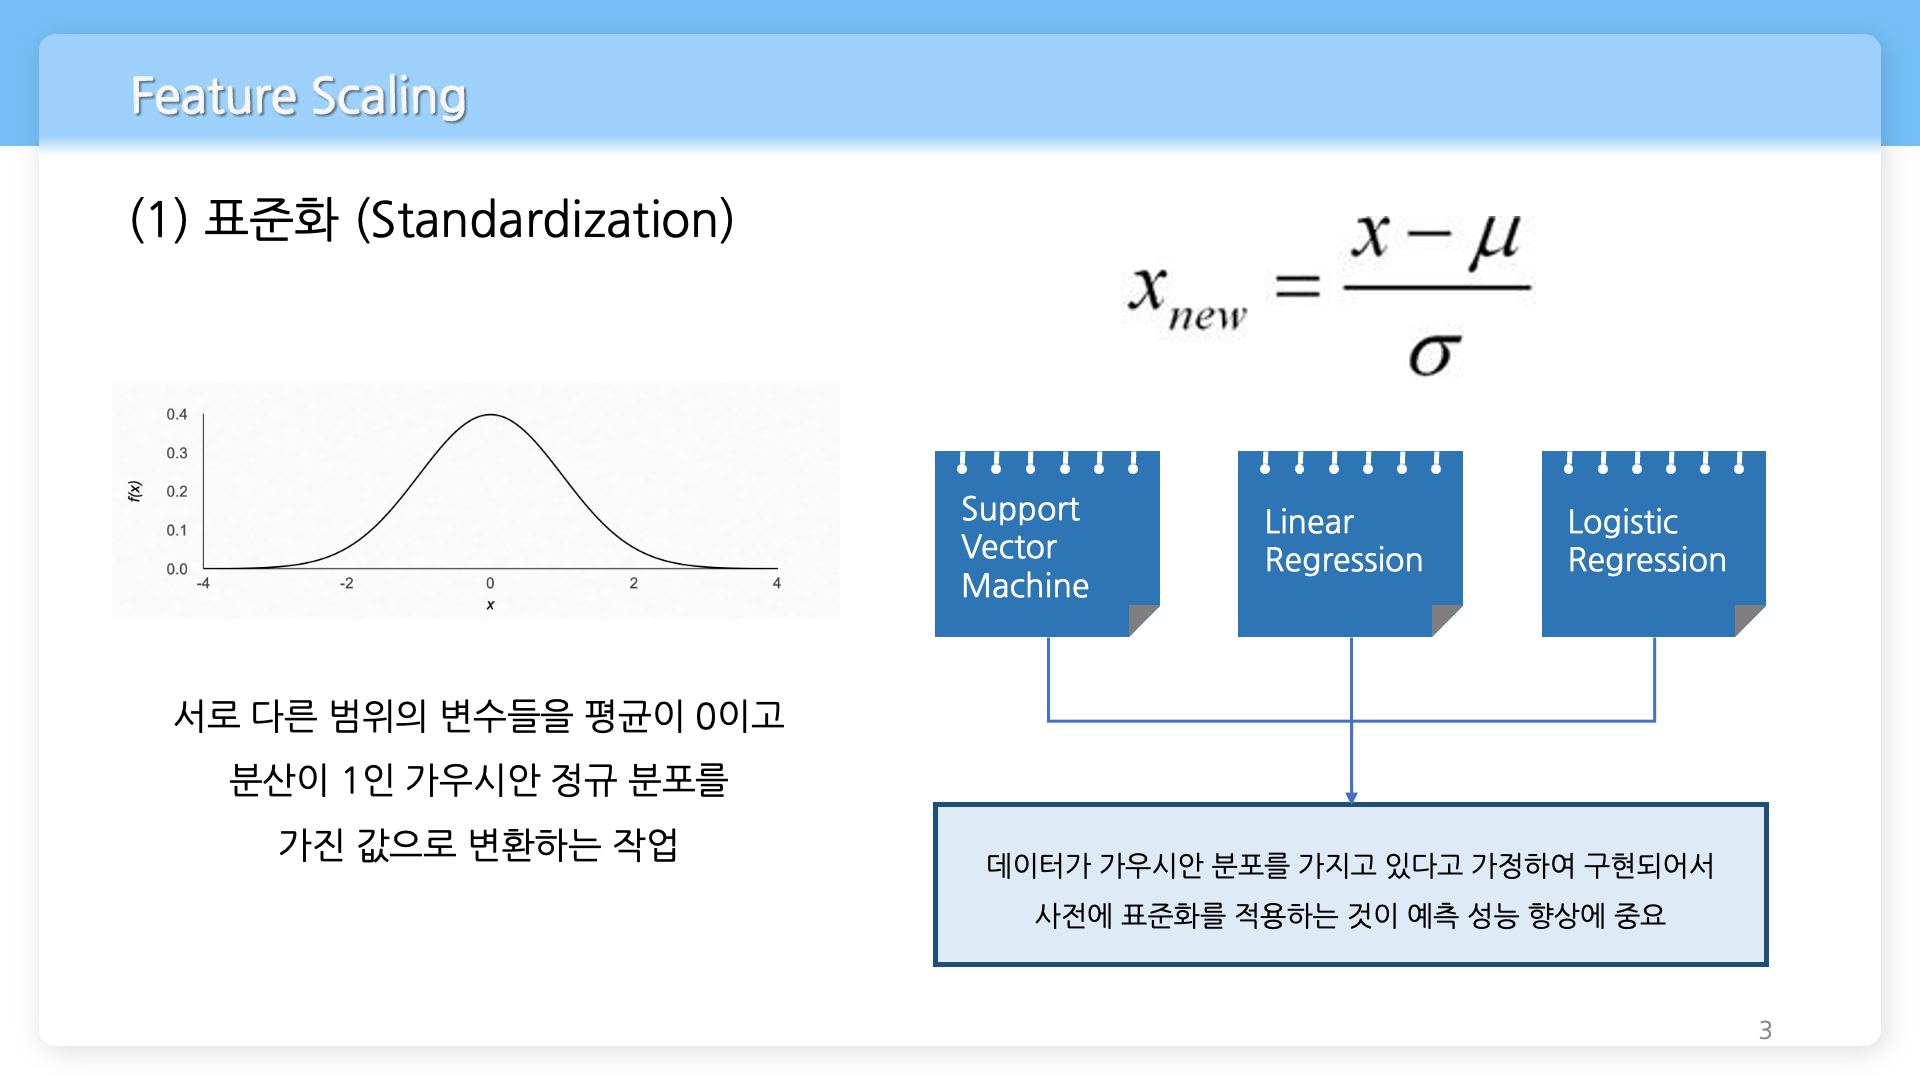

In [9]:
Image('표준화예시사진.png')

- 일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
- A는 거리를 나타내는 변수 값 0~ 100, B 는 금액 나타나는 속성 0~ 1,000,000,000,000이면 두 변수를 동일한 크기 단위로 비교하기 위해 0~1사이로 변환



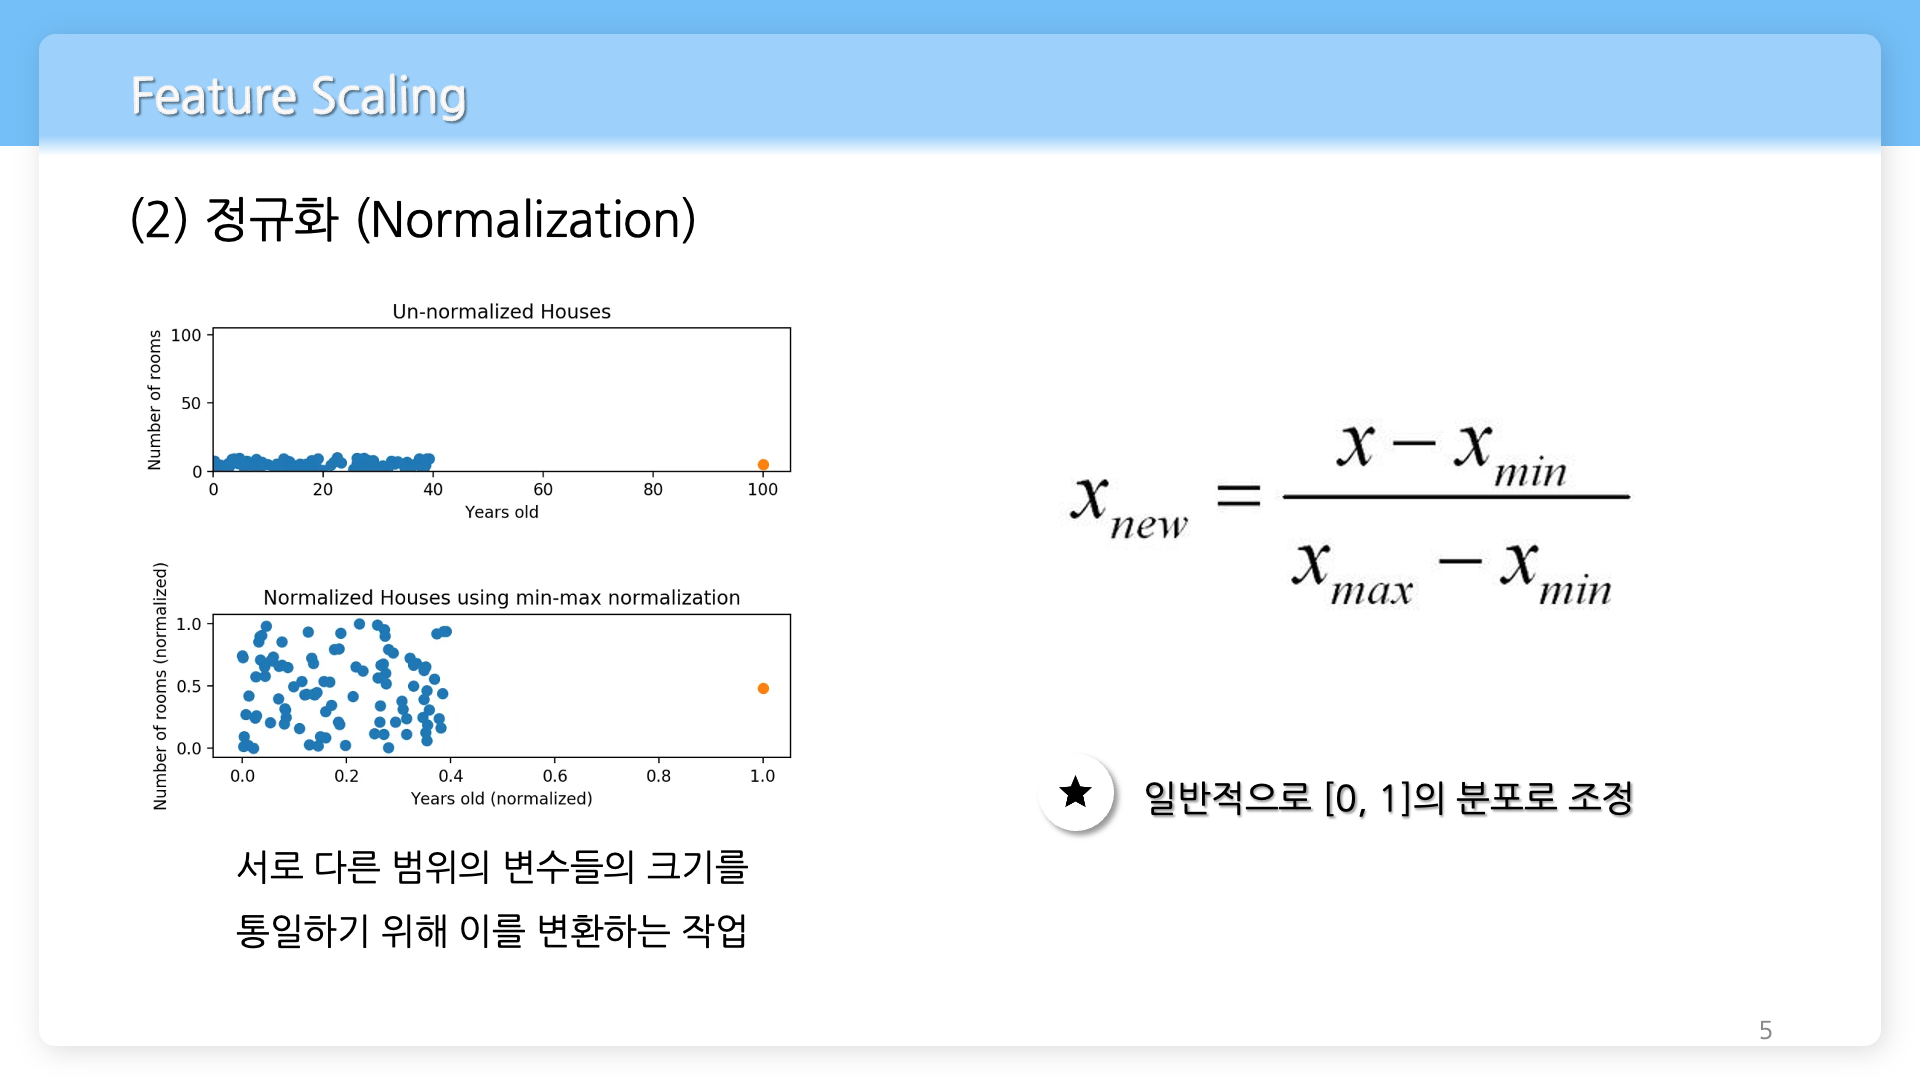

In [10]:
Image('정규화예시사진.png')

<div class="alert alert-block" style="border: 2px solid #E65100;background-color:#FFF3E0;padding:10px">
    
#사이킷런 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
- 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환 의미
- 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눔, 세 개의 피처 x,y,z가 있으면 새로운 데이터 x_new는 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠줌 (정규 벡터화)
    

</div>

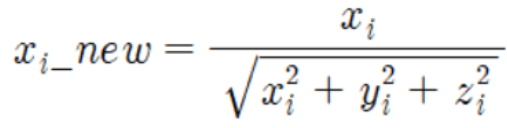

In [11]:
Image('벡터정규화예시사진.png')

## StandardScaler
- 표준화를 쉽게 지원하기 위한 클래스
- 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환 
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것
- 사이킷런 RBF 커널 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우신 반포 가정, 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- StandardScaler 객체를 생성 후에 fit()과 trnasform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환
- transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값 분산값 다시 확인!

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변화노딘 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


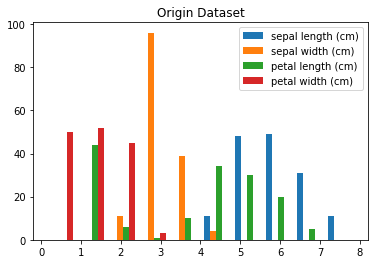

In [4]:
iris_df_standarded= (iris_df - iris_df.mean())/iris_df.std()

plt.title('Origin Dataset')
plt.hist(iris_df)
plt.legend(iris_df.columns)

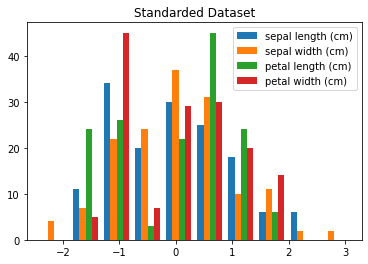

In [5]:
plt.title('Standarded Dataset')
plt.hist(iris_df_standarded)
plt.legend(iris_df_scaled.columns)

- 모든 컬럼 값의 평균이 0에 아주 까가운 값으로, 분산은 1에 아주 까가운 값으로 변환

## MinMaxScaler
- 데이터 값을 0과 1사이의 범위 값으로 변환 (음수 값이면 -1에서 1값으로 변환)
- 데이터 분포가 가우시안 분포가 아닌 경우에 Min,Max Scale을 적용
- 분류보다 회귀에 유용합니다.

In [4]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


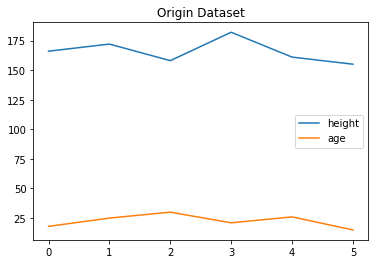

In [18]:
df = pd.DataFrame([[166, 18],
                  [172, 25],
                  [158, 30],
                  [182, 21],
                  [161, 26],
                  [155, 15]])
df.columns = ['height', 'age']
df_new = (df - df.min())/(df.max() - df.min())

# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)



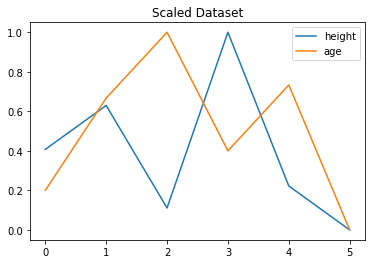

In [17]:
plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

- 모든 피처에 0에서 1사이의 값으로 변환되는 스케일링 적용

# MaxAbsScaler()
- 각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
- 즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같습니다.
- 이상치에 매우 민감합니다.

In [5]:
from sklearn.preprocessing import MaxAbsScaler

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxabs_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = maxabs_scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

# 테스트 데이터의 스케일링
#X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)    0.544304
sepal width (cm)     0.454545
petal length (cm)    0.144928
petal width (cm)     0.040000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


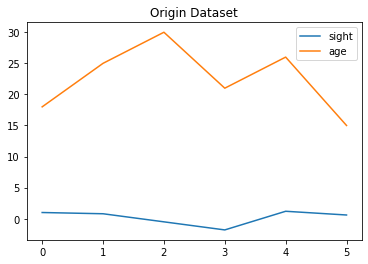

In [20]:
df = pd.DataFrame([[1.0, 18],
                  [0.8, 25],
                  [-0.5, 30],
                  [-1.8, 21],
                  [1.2, 26],
                  [0.6, 15]])
df.columns = ['sight', 'age']
df_new = df/df.abs().max()

# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

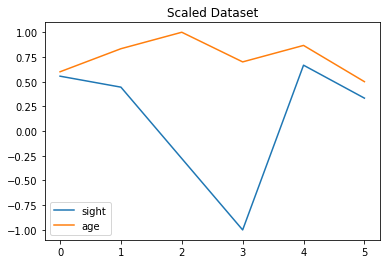

In [21]:

plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

# RobustScaler()
- 평균과 분산 대신에 중간 값과 사분위 값을 사용합니다.
- 중간 값은 정렬시 중간에 있는 값을 의미하고
- 사분위값은 1/4, 3/4에 위치한 값을 의미합니다.
- 이상치 영향을 최소화할 수 있습니다.

In [23]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = robust_scaler.transform(iris_df)

# 테스트 데이터의 스케일링
#X_test_scaled = robust_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)


#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


In [17]:
df[['pclass','fare']]

,pclass,fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Normalizer()
- 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다.
- 그러나 Normalizer 의 경우 각 샘플(행)마다 적용되는 방식입니다.
- 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
- 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
- 모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
- 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.

## 
    - 소득 나이 통장개수 잔액 
    - 1000000 50 5  2000
    - 50000000 40 3 3000
    

In [22]:
from sklearn.preprocessing import Normalizer

# 변형 객체 생성
normal_scaler = Normalizer()

# 훈련데이터의 모수 분포 저장
normal_scaler.fit(iris_df)

# 훈련 데이터 스케일링
X_train_scaled = normal_scaler.transform(iris_df)
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())
# 테스트 데이터의 스케일링
#X_test_scaled = normal_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = normal_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)   -1.870024
sepal width (cm)    -2.433947
petal length (cm)   -1.567576
petal width (cm)    -1.447076
dtype: float64

feature들의 최댓값
sepal length (cm)    2.492019
sepal width (cm)     3.090775
petal length (cm)    1.785832
petal width (cm)     1.712096
dtype: float64


## 변수구간화
- 데이터가 연속형으로 데이터에 대해서 범주형 변수로 구간을 나눠서 데이터를 구간화 작업한다.
- 대표적으로 나이-> 0~100세 나이를 유아, 청소년, 청년, 중장년, 노인 등등 나눌 수 있다.

- 이산 값 -> 평활화 하는 방식으로 진행할 수도 있다.
- 연속적인 값도 구간화로 사용할 수 있다.

In [16]:
## 판다스에서 제공하는 패키지
## pd.cut 함수 연속형 데이터를 지정한 구간으로 나누어 범주형으로 변환

import pandas as pd

data = pd.DataFrame({'age':[25,26,15,13,80,50,30,35,77,61]})

## 구간화 나누기
bins = [0, 15, 35, 60, 100] #구간 경계 설정 
labels = ['Child','Youth','Adult','Senior']

## 구간화 진행
data['age_group']=pd.cut(data['age'], bins= bins, labels = labels)

In [17]:
## pd.qcut 
## 데이터의 분포를 고려하여 구간을 나눈다.


#data = pd.DataFrame({'age':[25,26,15,13,80,50,30,35,77,61]})

data['age_group_qcut']=pd.qcut(data['age'],q=3,labels = ['Child','Youth','Adult'])


In [22]:
## numpy 도 가능하다.
## np.digitize
import numpy as np
data =np.array([1.5, 2.5, 3.6 ,4.8 ,0.7 ,6.5])

#bins 구간 경계설정

bins = [0,2,4,6,8]

bins_indices=np.digitize(data, bins)

In [23]:
bins_indices

array([1, 2, 2, 3, 1, 4])

In [25]:
##sklearn 패키지에서 구간도 가능하다.
##KBinsDiscretizer 데이터 구간화
## 구간을 나누고, 각 구간의 이진 특성으로 변환 가능

from sklearn.preprocessing import KBinsDiscretizer

data = np.array([[10],[20],[30],[40],[50],[60]])

In [27]:
## 구간화 수행
est=KBinsDiscretizer(n_bins = 3, encode ='onehot-dense',strategy = 'uniform')

In [30]:
bin_data=est.fit_transform(data)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [31]:
bin_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

## 이상치를 처리하고 구간화를 만들기

In [43]:
data = pd.DataFrame({'age':[25,26,15,13,80,50,30,35,77,61,500]})

## 분위수 가지고 이상치 처리해 보기
d95 =  data['age'].quantile(0.95)
data['age']=np.where(data['age'] > d95, d95, data['age'])

##데이터를 이상치를 변환하고 구간화를 작업 하는 경우에 quantile로 진행할 수 있다.

## 로그변환 같은 변환을 통해서 구간화 진행

In [44]:
data =pd.DataFrame({
    'income':[10000,50000,60000,80000,25000,125800,20054,188800]
})

In [46]:
data['qcut_income']=pd.qcut(data['income'],q=3,labels = ['Low','Mid','High'])


In [49]:
##로그변환
data['log_income']=np.log1p(data['income'])

In [51]:
data['qcut_income_log']=pd.qcut(data['log_income'],q=3,labels = ['Low','Mid','High'])


## 동적 구간화 (Dynamic Binning)
- 동적 구간화 데이터의 분포나 타겟변수 간의 관계 기반으로 자동으로 구간을 설정하는 방법
- 고정된 구간이 아니라 데이터를 분석해서 구간을 자동을 생성

- 결정트리(Decision Tree) 데이터를 분할하는데 -> 결정 트리의 데이터를 분할하면서 정보량이 가장 높은 구간을 활용해서 동적 구간을 설정한다.

In [53]:
data= pd.DataFrame({
    'age':[25,26,15,13,80,50,30,35,77,61],
    'income':[10000,50000,60000,80000,25000,125800,20054,188800,50080,12542]
})

In [57]:
## 클래스가 필요하다.
target=np.random.randint(0,2 , size=len(data))

In [58]:
target

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [61]:
## 결정 트리를 사용하여 구간 경계를 찾는다.
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_leaf_nodes = 4) #최대 리프 노드는 4개 제한
tree.fit(data[['income']],target)


DecisionTreeClassifier(max_leaf_nodes=4)

In [66]:
#트리 구간의 경게를 추출 threshold
thresholds =np.sort(tree.tree_.threshold[tree.tree_.threshold !=-2])

In [69]:
#해당 임계수치를 가지고 binning
bins = np.concatenate(([data['income'].min()], thresholds, [data['income'].max()]))

In [71]:
data['income_dt_cut']=pd.cut(data['income'], bins=bins, labels=[f'Bin{i+1}' for i in range(len(bins)-1)])

In [72]:
data

,age,income,income_dt_cut
0,25,10000,NaN
1,26,50000,Bin2
2,15,60000,Bin3
3,13,80000,Bin3
4,80,25000,Bin2
5,50,125800,Bin3
6,30,20054,Bin1
7,35,188800,Bin4
8,77,50080,Bin2
9,61,12542,Bin1


## WOE (Weight of Evidence, WOE)
- 통계적으로 신용 위험 모델링시 진행하는 것
- 연속형 변수를 구간화하면서 목표변수 (종속변수, 이진 분류인 경우, 사기, 정상) 에 영향을 정략적으로 얼마나 미치는지 표현할 수 있다.

- 장점 
    - 구간화된 변수랑 y값과 (목표변수) 관계를 명확하게 표현할 수 있다. 모델에 대한 이해와 해석에 유용하다.

In [73]:
data= pd.DataFrame({
    'age':[25,26,27,29,80,50,30,35,77,61],
    'default':[0,0,0,1,0,1,1,1,0,0]})

In [75]:
## 데이터의 구간을 나눠보기
## 구간화된 값과 y값(목표변수)에 대해서 어떤 영향을 주는지 해석할 수 있다.

bins = [0,30,35,60,100]
lables= ['Child','Youth','Adult','Senior']

data['age_group']=pd.cut(data['age'], bins= bins ,labels= labels)

In [76]:
data

,age,default,age_group
0,25,0,Child
1,26,0,Child
2,27,0,Child
3,29,1,Child
4,80,0,Senior
5,50,1,Adult
6,30,1,Child
7,35,1,Youth
8,77,0,Senior
9,61,0,Senior


In [77]:
## WoE 계산 함수

def calculate_woe(df, group_col, target_col):
    woe_dict={}
    for group in df[group_col].unique():
        total=df[df[group_col]==group].shape[0] #특정 구간에 속한 전체 수
        good = df[(df[group_col]==group) &(df[target_col]==0)].shape[0]
        bad = df[(df[group_col]==group) &(df[target_col]==1)].shape[0]
        
        # 전체 연체 있거나 없는 경우
        total_good = df[df[target_col]==0].shape[0]
        total_bad = df[df[target_col]==1].shape[0]
        
        # 분포 비율 계산
        good_dist = good/total_good if total_good >0 else 0
        bad_dist = bad/total_bad if total_bad >0 else 0
        
        # WoE 계산 ()
        woe_value=np.log((good_dist +1e-6)/ (bad_dist + 1e-6))
        woe_dict[group] = woe_value
        
    return woe_dict

In [78]:
woe_dict =calculate_woe(data, 'age_group','default')

In [79]:
woe_dict

{'Child': 0.0,
 'Senior': 13.122365377402328,
 'Adult': -12.429220196836383,
 'Youth': -12.429220196836383}